# Titanic: Machine Learning from Disaster

*Competition Description*

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

*source* https://www.kaggle.com/c/titanic/overview

# Step 1 - Identify the dependent variable

In this case, y is  passengers survived.

And task is to understand/find what type of passengers have highest chance to survive in this disaster/


# Step 2 - Import data

Dataset contains training dataset and test dataset

In [1]:
# ! pip install numpy
# ! pip install pandas
import numpy as np
import pandas as pd
train=pd.read_csv(r'~/Machine_Learning_101/3_Suervised_Learning_Decision_Tree/train.csv')
test=pd.read_csv(r'~/Machine_Learning_101/3_Suervised_Learning_Decision_Tree/test.csv')
print('training dataset：',train.shape,',testing dataset：',test.shape)

('training dataset\xef\xbc\x9a', (891, 12), ',testing dataset\xef\xbc\x9a', (418, 11))


In [2]:
# Combine 2 different dataset to do data cleaning
full=train.append(test,ignore_index=True)
print('Combined data：',full.shape)

('Combined data\xef\xbc\x9a', (1309, 12))


In [3]:
# check the data
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In above chart, we can tell:

1) Age has missing values
2) Fare has missing values or incorrect values - as Fare cannot be 0

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


from full.info, we could get more information about the dataset:

1. Age column has missed 263 records - (1309-1046).

2. Cabin only has 295 entries, which means more than 77% entries don't have information.

3. Enbarked missed 2 records - (1309 -1307).

4. Fare missed 1 records - (1309-1308).

5. Survived only has 891 records.


# Step 3 - Data Cleaning

1) Pick the main features - in this case as we only want to run the basic model and the features (independent variables)are not too many, so we will use all features.

2) Rename the column names - normally if some column's name doesn't make sense we should rename it.

3) Cleaning missing values - in this case, we need to fill AGE, CABIN, ENBARKED and FARE missing values



In [6]:
# For numeric columns
# Fill Age - use mean value to refill
full['Age']=full['Age'].fillna(full['Age'].mean())

# Fill Fare - use mean value to refill
full['Fare']=full['Fare'].fillna(full['Fare'].mean())

full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
# Fill Carbin information
print (full['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B61' 'C5

In [8]:
# Fill Fare - use U value to refill - means Unknown
full['Cabin']=full['Cabin'].fillna('U')

full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Embarked - Port of Embarkation

C = Cherbourg

Q = Queenstown

S = Southampton

In [9]:
# Check Embarked information
print (full[full['Embarked'].isnull()])
print (full['Embarked'].unique())
print (full['Embarked'].value_counts())

      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
61       0           62       1  female      0       1.0  113572  
829      0          830       1  female      0       1.0  113572  
['S' 'C' 'Q' nan]
S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [10]:
# As there are only 2 missing values from Embarked, so I will refill the highest frequency value in
full['Embarked']=full['Embarked'].fillna('S')

# Feature Engineering

To convert dataset into a calculated format

For example, when we have a data input as {'Sex': 'Female', 'Male', 'Female'}.

We need to convert it into this format {'Sex': 0,1,0}


In [11]:
# Sex
sex_mapdict = {'male': 1, 'female': 0}
sex = full['Sex'].map(sex_mapdict)
sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [12]:
# Embarked is a classification data set
embarkeddf = pd.DataFrame()
embarkeddf = pd.get_dummies(full['Embarked'], prefix='Embarked')
embarkeddf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
# Pclass - similar with Embarked
pclassdf = pd.DataFrame()
pclassdf = pd.get_dummies(full['Pclass'], prefix='Pclass')
pclassdf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [14]:
# Name 
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
def gettitle(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3
#     strip() method normally uses to remove seleted value, default value as space

titledf = pd.DataFrame()
titledf['Title'] = full['Name'].map(gettitle)
titledf['Title'].value_counts()
    

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Title, dtype: int64

In [16]:
title_mapdict={'Capt':'Officer', 'Col': 'Officer', 'Major':'Officer', 'Dr': 'Officer','Rev':'Officer',
              'Jonkheer':'Royalty', 'Don':'Royalty', 'Sir':'Royalty','the Countess':'Royalty','Dona':'Royalty','Lady':'Royalty',
              'Mme':'Mrs','Ms':'Mrs','Mrs':'Mrs',
              'Mlle':'Miss','Miss':'Miss',
              'Mr':'Mr',
              'Master':'Master'}
titledf['Title']=titledf['Title'].map(title_mapdict)
titledf=pd.get_dummies(titledf['Title'])
titledf.head()



,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [17]:
# Cabin
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [18]:
cabindf=pd.DataFrame()
full['Cabin']=full['Cabin'].map(lambda c:c[0])
cabindf=pd.get_dummies(full['Cabin'],prefix='Cabin')
cabindf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


Parch - Number of parents / children aboard the Titanic

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)



In [19]:
print (full['Parch'].unique())
print (full['Parch'].value_counts())

[0 1 2 5 3 4 6 9]
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64


In [22]:
familydf=pd.DataFrame()
familydf['Familysize']=full['Parch']+full['SibSp']+1 
# here 1 means the passenger self

familydf['Family_Single']= familydf['Familysize'].map(lambda s:1 if s == 1 else 0)
familydf['Family_Small'] = familydf['Familysize'].map(lambda s:1 if 2 <= s <= 4 else 0)
familydf['Family_Large'] = familydf['Familysize'].map(lambda s:1 if s >= 5 else 0)
familydf.head()

,Familysize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


### Key Indenpendent variables 


In [20]:
corrdf=full.corr()
corrdf

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.171521,-0.130872,0.025731,-0.366371,-0.190747,-0.070323
Fare,0.171521,1.000000,0.221522,0.031416,-0.558477,0.160224,0.257307
Parch,-0.130872,0.221522,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.025731,0.031416,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.366371,-0.558477,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.190747,0.160224,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.070323,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [23]:
# combine all the key features
fullall=pd.concat([full,sex,embarkeddf,pclassdf,titledf,cabindf,familydf],axis=1)
fullcorrdf=fullall.corr()
fullcorrdf['Survived'].sort_values(ascending=False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
Familysize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Pclass          -0.338481
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

In [24]:
# Final cleaned dataset
full_x=pd.concat([titledf[['Mr','Mrs','Miss']],pclassdf[['Pclass_3','Pclass_1']],familydf[['Family_Small','Family_Single']],full['Fare'],sex],axis=1)
full_x.head()

,Mr,Mrs,Miss,Pclass_3,Pclass_1,Family_Small,Family_Single,Fare,Sex
0,1,0,0,1,0,1,0,7.2500,1
1,0,1,0,0,1,1,0,71.2833,0
2,0,0,1,1,0,0,1,7.9250,0
3,0,1,0,0,1,1,0,53.1000,0
4,1,0,0,1,0,0,1,8.0500,1


## Step 4 - Build Model

In this session, we will pick Decision Tree

In [25]:
# 1 - Get train dataset and test dataset

sourcerow=train.shape[0]
source_x=full_x.loc[0:sourcerow-1,:]
source_y=full.loc[0:sourcerow-1,'Survived']
# Predict dataset
pred_x=full_x.loc[sourcerow:,:]
# Training dataset and test dataset   
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(source_x,source_y,train_size=0.8)
print('orignal X：',source_x.shape,'Training X：',train_x.shape,'Testing X：',test_x.shape)
print('orignal Y：',source_y.shape,'Training Y：',train_y.shape,'Testing Y：',test_y.shape)

('orignal X\xef\xbc\x9a', (891, 9), 'Training X\xef\xbc\x9a', (712, 9), 'Testing X\xef\xbc\x9a', (179, 9))
('orignal Y\xef\xbc\x9a', (891,), 'Training Y\xef\xbc\x9a', (712,), 'Testing Y\xef\xbc\x9a', (179,))


/Users/sijia.li/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Decision Tree Classifier

In [26]:
# Training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
# Testing
predtest_y=model.predict(test_x)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predtest_y)

0.8268156424581006

In [27]:
list(train_x)

['Mr',
 'Mrs',
 'Miss',
 'Pclass_3',
 'Pclass_1',
 'Family_Small',
 'Family_Single',
 'Fare',
 'Sex']

In [29]:
import graphviz # doctest: +SKIP
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("tree") # doctest: +SKIP


dot_data = tree.export_graphviz(model, out_file=None, # doctest: +SKIP
                            feature_names=list(train_x),  # doctest: +SKIP
                            class_names='Survived',  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph.view() # doctest: +SKIP


'Source.gv.pdf'

# Output

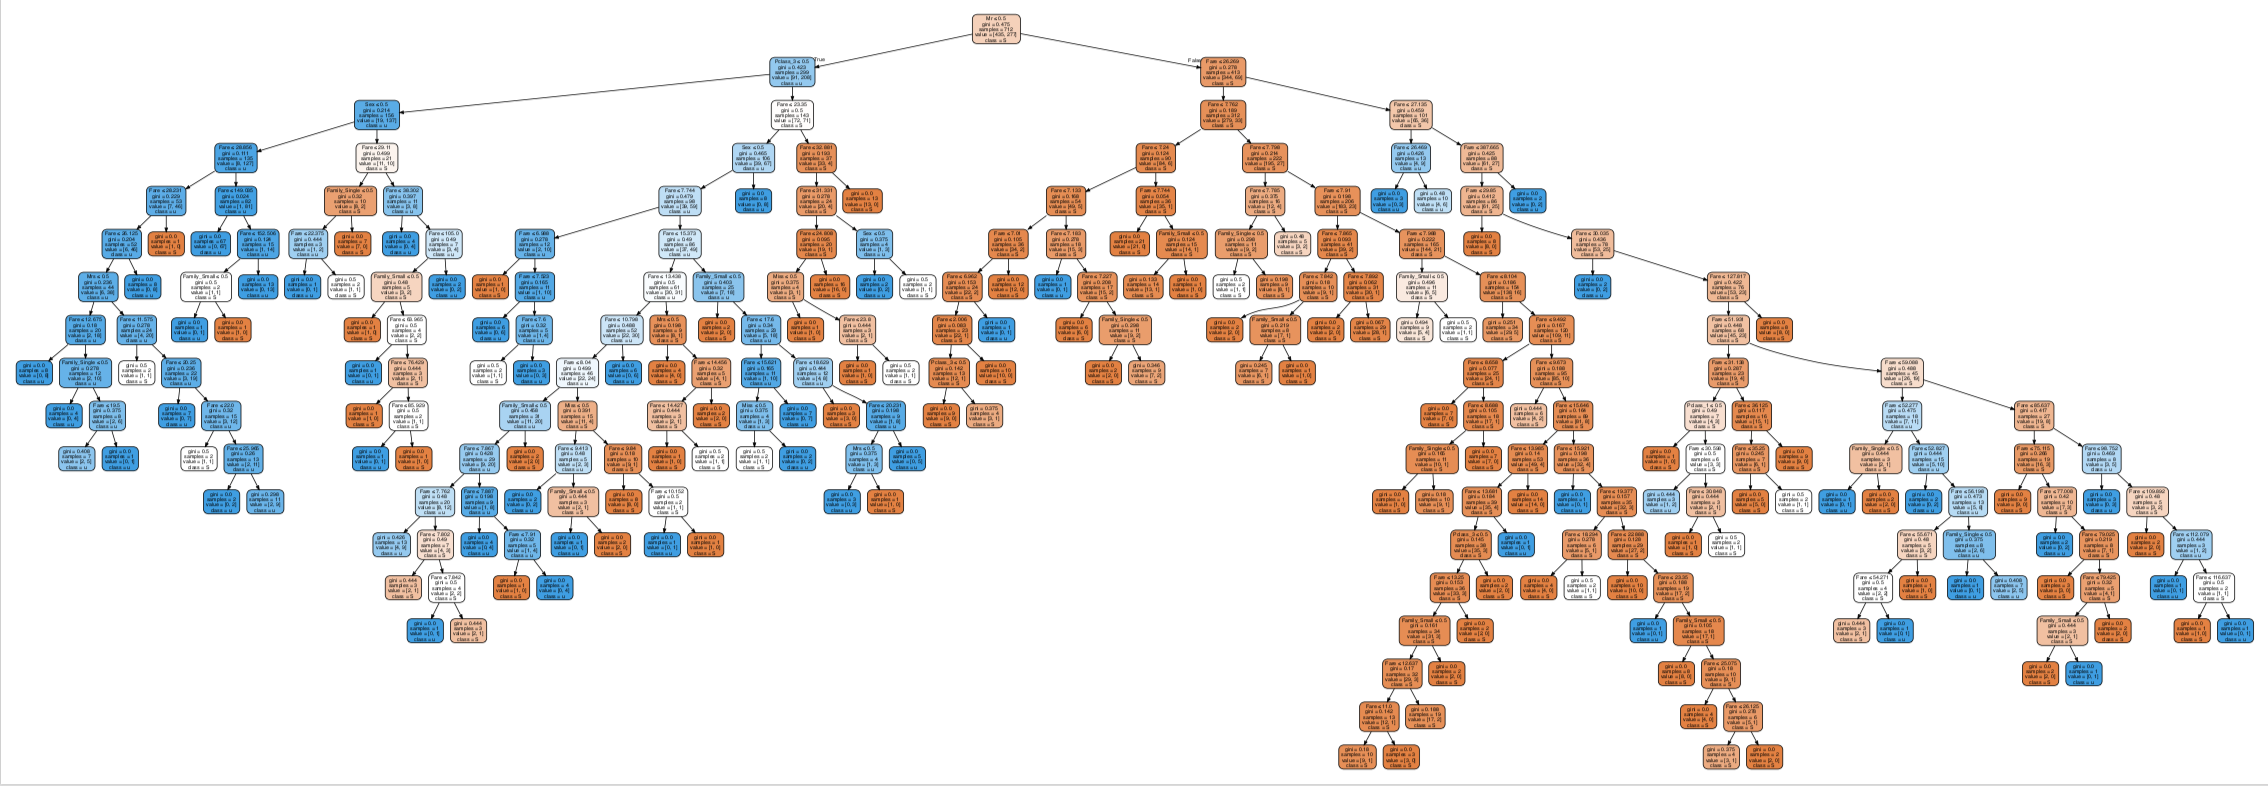